In [1]:
import warnings

warnings.filterwarnings("ignore")

import os
import sys

dir2 = os.path.abspath("")
dir1 = os.path.dirname(dir2)
if dir1 not in sys.path:
    sys.path.append(dir1)

os.chdir("..")

In [2]:
import numpy as np
import yaml
from pytorch_lightning import Trainer
from pytorch_lightning.callbacks import EarlyStopping
from pytorch_lightning.loggers import CometLogger
from src.datasets.datasets import CPDDatasets
from src.metrics.evaluation_pipelines import evaluation_pipeline
from src.models.model_utils import get_models_list
from src.utils.fix_seeds import fix_seeds
from src.utils.visualize import visualize_predictions
from torch.utils.data import DataLoader

%load_ext autoreload
%autoreload
%matplotlib inline

comet_ml is installed but `COMET_API_KEY` is not set.


In [3]:
model_type = "seq2seq"

experiments_name = "mnist"

# read config file
path_to_config = "configs/" + experiments_name + "_" + model_type + ".yaml"

with open(path_to_config, "r") as f:
    args_config = yaml.safe_load(f.read())

args_config["experiments_name"] = experiments_name
args_config["model_type"] = model_type

args_config["loss_type"] = "indid"
args_config["num_workers"] = 2

# prepare datasets
train_dataset, test_dataset = CPDDatasets(experiments_name).get_dataset_()

In [4]:
indid_model = get_models_list(args_config, train_dataset, test_dataset)[-1]
indid_model

CPDModel(
  (model): MnistRNN(
    (rnn): LSTM(784, 32, batch_first=True, dropout=0.25)
    (linears): ModuleList()
    (output_layer): Linear(in_features=32, out_features=1, bias=True)
    (dropout): Dropout(p=0.5, inplace=False)
    (sigmoid): Sigmoid()
    (relu): ReLU(inplace=True)
  )
  (loss): CPDLoss()
)

In [5]:
fix_seeds(42)

model_name = "indid_mnist_new_loss_seed_42"

In [ ]:
logger = CometLogger(
    save_dir=f"logs/{experiments_name}",
    api_key="agnHNC2vEt7tOxnnxT4LzYf7Y",
    project_name="indid",
    workspace="stalex2902",
    experiment_name=model_name,
)

trainer = Trainer(
    max_epochs=100,
    gpus=1,
    benchmark=True,
    check_val_every_n_epoch=1,
    gradient_clip_val=args_config["learning"]["grad_clip"],
    logger=logger,
    callbacks=EarlyStopping(**args_config["early_stopping"]),
)

trainer.fit(indid_model)

In [7]:
import torch

torch.save(indid_model.state_dict(), f"saved_models/indid/mnist/{model_name}.pth]")
# indid_model.load_state_dict(torch.load(f"saved_models/indid/mnist/{model_name}.pth]"))

In [8]:
val_dataloader = DataLoader(test_dataset, batch_size=64, shuffle=True)
seq_batch, labels_batch = next(iter(val_dataloader))

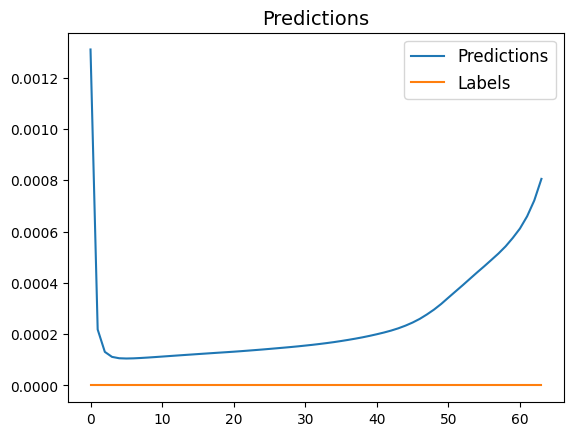

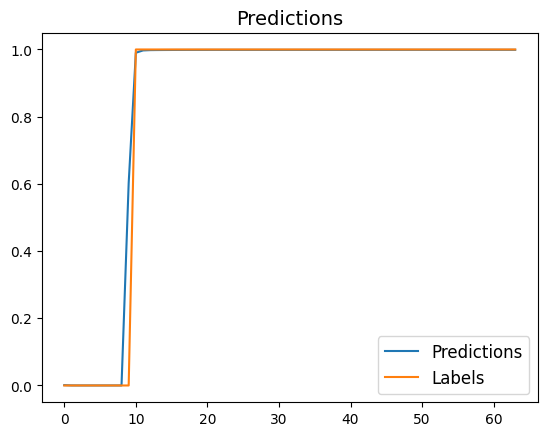

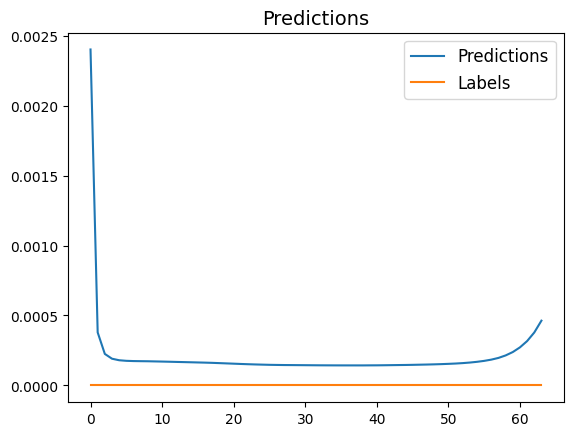

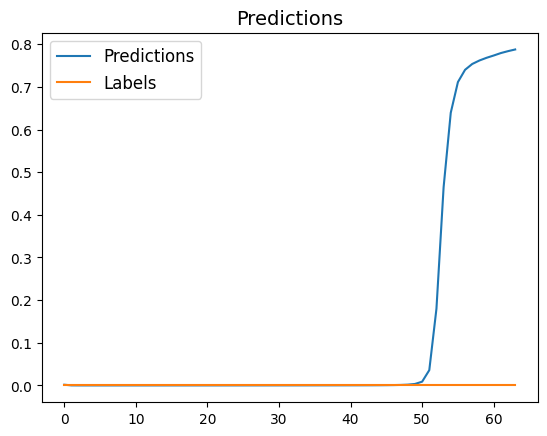

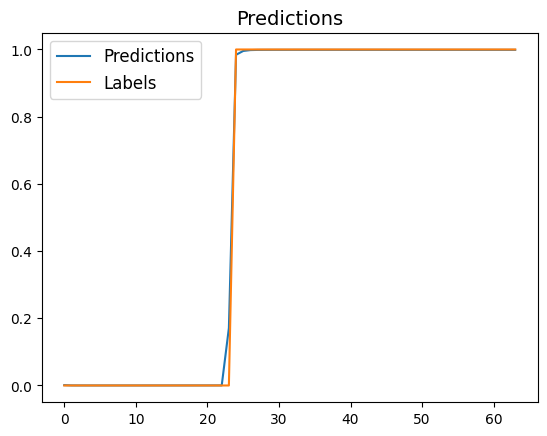

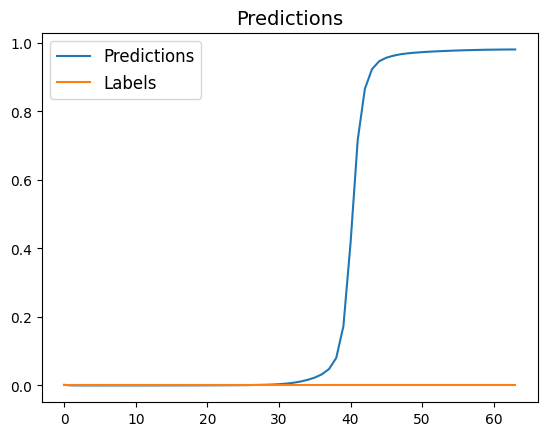

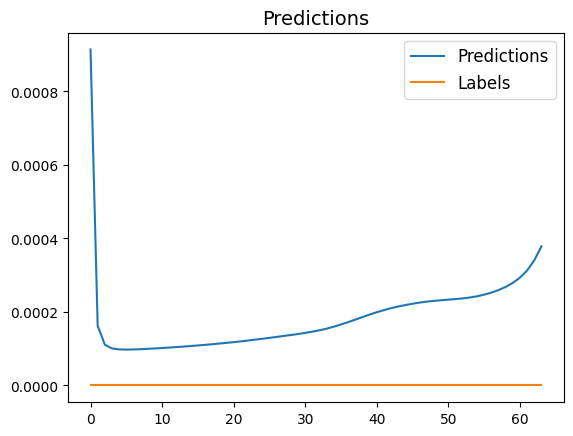

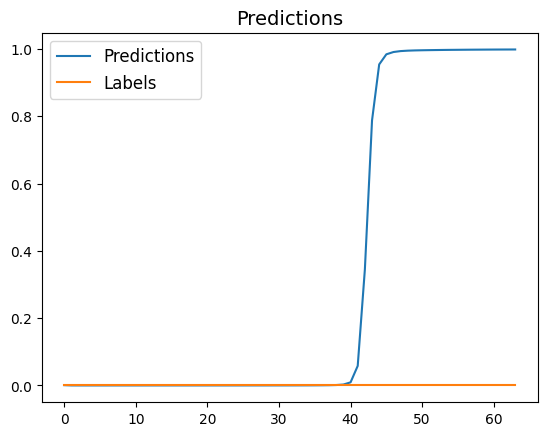

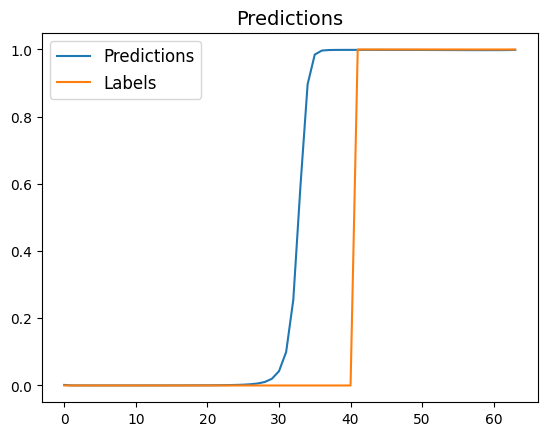

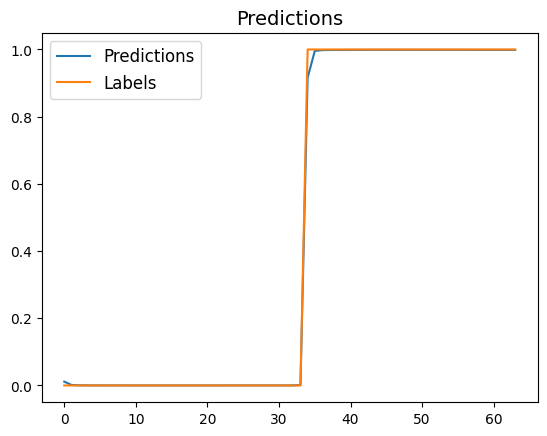

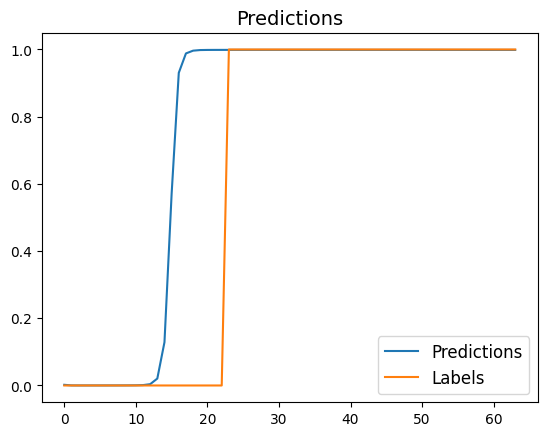

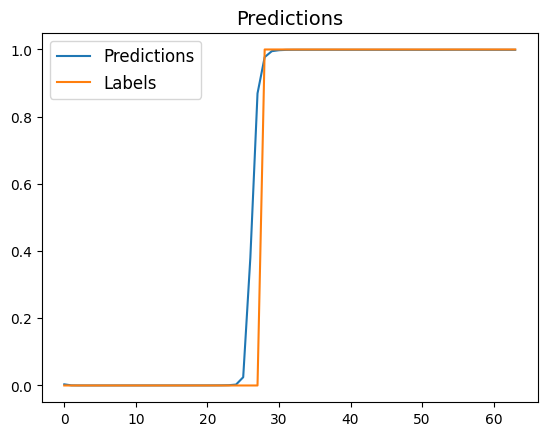

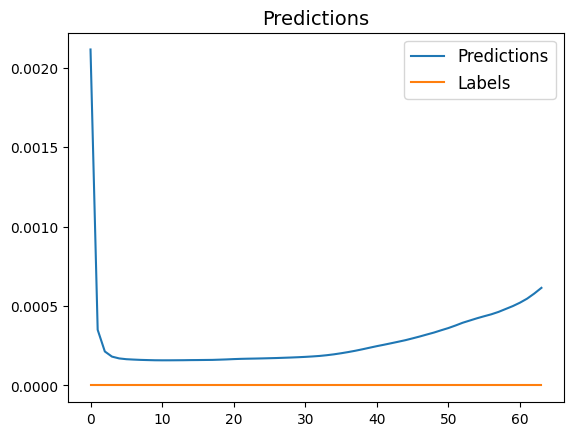

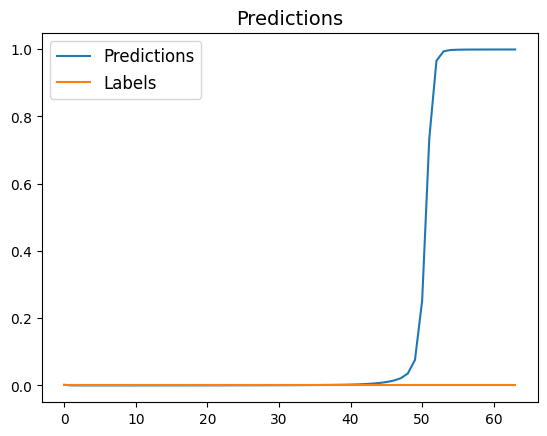

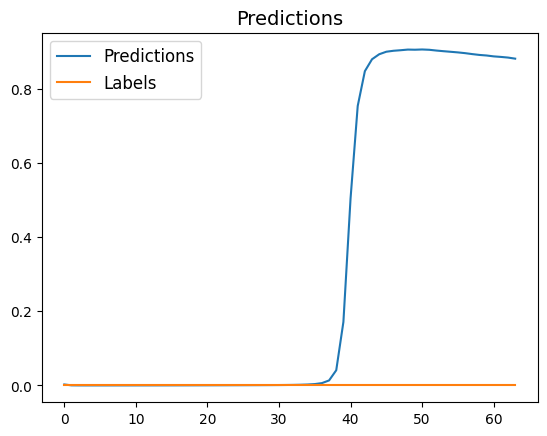

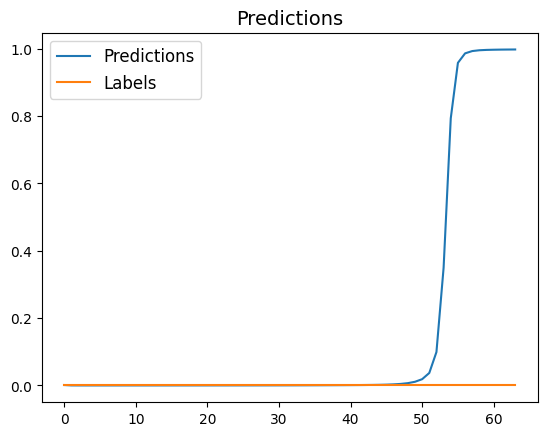

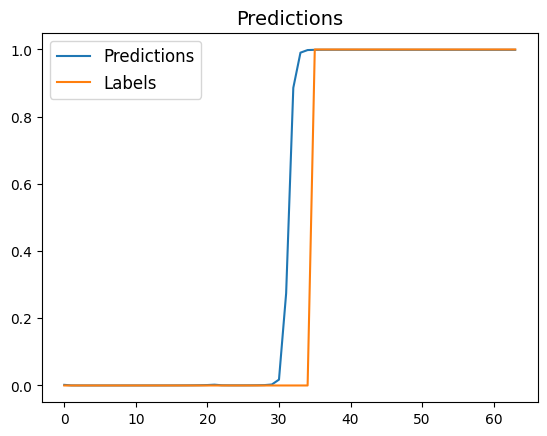

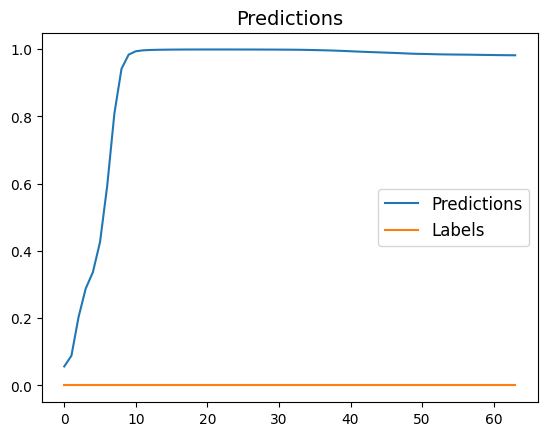

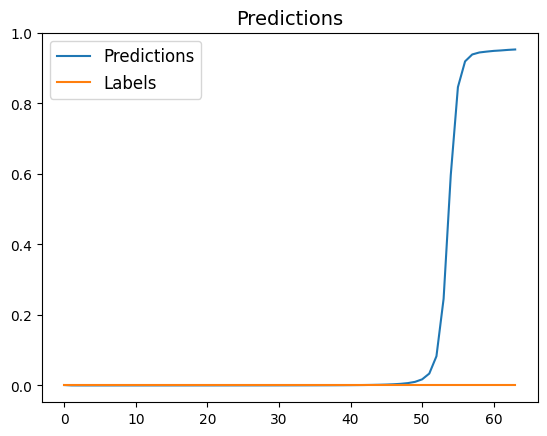

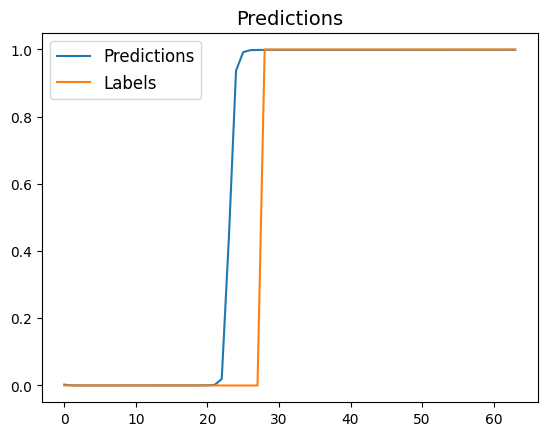

In [9]:
visualize_predictions(
    indid_model,
    model_type="seq2seq",
    sequences_batch=seq_batch,
    labels_batch=labels_batch,
    n_pics=20,
    device="cuda",
)

In [10]:
# new loss

threshold_number = 100
threshold_list = np.linspace(-5, 5, threshold_number)
threshold_list = 1 / (1 + np.exp(-threshold_list))
threshold_list = [-0.001] + list(threshold_list) + [1.001]

metrics, (max_th_f1_margins_dict, max_f1_margins_dic), _, _ = evaluation_pipeline(
    indid_model,
    val_dataloader,
    threshold_list,
    device="cuda",
    model_type="seq2seq",
    verbose=True,
    margin_list=[2, 4, 8],
)

  0%|          | 0/5 [00:00<?, ?it/s]

Collectting model's outputs


100%|██████████| 5/5 [00:11<00:00,  2.39s/it]


TN: 0, FP: 300, FN: 0, TP: 0, DELAY:0.0, FP_DELAY:0.0, COVER: 0.7930045572916666
TN: 7, FP: 275, FN: 0, TP: 18, DELAY:0.02666666731238365, FP_DELAY:32.393333435058594, COVER: 0.7719576165692476
TN: 7, FP: 275, FN: 0, TP: 18, DELAY:0.02666666731238365, FP_DELAY:32.689998626708984, COVER: 0.7732335067397006
TN: 7, FP: 275, FN: 0, TP: 18, DELAY:0.02666666731238365, FP_DELAY:32.779998779296875, COVER: 0.7746631267983095
TN: 7, FP: 275, FN: 0, TP: 18, DELAY:0.029999999329447746, FP_DELAY:32.880001068115234, COVER: 0.7764214991469762
TN: 9, FP: 273, FN: 0, TP: 18, DELAY:0.029999999329447746, FP_DELAY:33.28666687011719, COVER: 0.7790369036611119
TN: 9, FP: 273, FN: 0, TP: 18, DELAY:0.029999999329447746, FP_DELAY:33.393333435058594, COVER: 0.7806905940642124
TN: 9, FP: 271, FN: 0, TP: 20, DELAY:0.03333333507180214, FP_DELAY:33.560001373291016, COVER: 0.783128690420812
TN: 9, FP: 271, FN: 0, TP: 20, DELAY:0.03333333507180214, FP_DELAY:33.62333297729492, COVER: 0.784359611996699
TN: 10, FP: 270,

In [14]:
# old (correct) loss

threshold_number = 100
threshold_list = np.linspace(-5, 5, threshold_number)
threshold_list = 1 / (1 + np.exp(-threshold_list))
threshold_list = [-0.001] + list(threshold_list) + [1.001]

metrics, (max_th_f1_margins_dict, max_f1_margins_dic), _, _ = evaluation_pipeline(
    indid_model,
    val_dataloader,
    threshold_list,
    device="cuda",
    model_type="seq2seq",
    verbose=True,
    margin_list=[2, 4, 8],
)

  0%|          | 0/5 [00:00<?, ?it/s]

Collectting model's outputs


100%|██████████| 5/5 [00:11<00:00,  2.37s/it]


TN: 0, FP: 300, FN: 0, TP: 0, DELAY:0.0, FP_DELAY:0.0, COVER: 0.7930045572916666
TN: 157, FP: 103, FN: 0, TP: 40, DELAY:0.1066666692495346, FP_DELAY:44.776668548583984, COVER: 0.9567427068119602
TN: 157, FP: 102, FN: 0, TP: 41, DELAY:0.10999999940395355, FP_DELAY:44.88666534423828, COVER: 0.958497906872957
TN: 157, FP: 102, FN: 0, TP: 41, DELAY:0.10999999940395355, FP_DELAY:44.90999984741211, COVER: 0.9591712313484386
TN: 157, FP: 101, FN: 0, TP: 42, DELAY:0.10999999940395355, FP_DELAY:44.92333221435547, COVER: 0.9595578818844206
TN: 157, FP: 100, FN: 0, TP: 43, DELAY:0.1133333370089531, FP_DELAY:44.9466667175293, COVER: 0.9600931161105255
TN: 158, FP: 98, FN: 0, TP: 44, DELAY:0.1133333370089531, FP_DELAY:45.16999816894531, COVER: 0.9603839039795697
TN: 158, FP: 98, FN: 0, TP: 44, DELAY:0.11666666716337204, FP_DELAY:45.16999816894531, COVER: 0.960296818406093
TN: 158, FP: 98, FN: 0, TP: 44, DELAY:0.12333333492279053, FP_DELAY:45.186668395996094, COVER: 0.9605820216679585
TN: 158, FP: 9

In [13]:
visualize_predictions(
    indid_model_old,
    model_type="seq2seq",
    sequences_batch=seq_batch,
    labels_batch=labels_batch,
    n_pics=20,
)

NameError: name 'indid_model_old' is not defined